<a href="https://colab.research.google.com/github/ujjawalsingh10/Malaria-Detection/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import InputLayer, MaxPool2D, Dense, Conv2D, Flatten, BatchNormalization
from google.colab import drive

In [56]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised = True, shuffle_files = True, split = ['train'])

In [57]:
dataset ## This dataset is made up of list.. with data, type so to get only the data.we use dataset[0]

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [58]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))
  return train_dataset, val_dataset, test_dataset

In [59]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# dataset = tf.data.Dataset.range(10)  ### This is an example...we will use the original Malaria dataset
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
# print(list(dataset.as_numpy_iterator()))

## We use take(1)  cuz its time consuming to print all
print("Training Dataset:", list(train_dataset.take(1).as_numpy_iterator()))
print("Validation dataset: ", list(val_dataset.take(1).as_numpy_iterator()))
print("Test dataset: ", list(test_dataset.take(1).as_numpy_iterator()))


Training Dataset: [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)]
Validation dataset:  [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
    

In [22]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear i

In [60]:
for data in dataset[0].take(4): ##Take(4) gives 4 examples with 4 labels
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(106, 121, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

### Data Visualization

TypeError: ignored

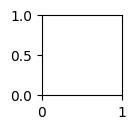

In [78]:
for i, (image ,label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

### Data Preprocessing

In [61]:
### resizing and rescaling the images
IM_SIZE = 224 ### Resize all the images to 224x224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [62]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [27]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [63]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [64]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

### Model building

In [93]:
lenet_model = tf.keras.Sequential([
                            InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),

                            Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation ='relu'),
                            BatchNormalization(),
                            MaxPool2D(pool_size = 2, strides = 2),

                            Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation ='relu'),
                            BatchNormalization(),
                            MaxPool2D(pool_size = 2, strides = 2),

                            Flatten(),

                            Dense(100, activation = 'relu'),
                            BatchNormalization(),

                            Dense(10, activation = 'relu'),
                            BatchNormalization(),

                            Dense(1, activation = 'sigmoid'),
                            ])
lenet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

### Compiler(Optimizer, loss and metrics)

In [96]:
lenet_model.compile(optimizer= Adam(learning_rate= 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy'
              )

In [39]:
history = lenet_model.fit(train_dataset, validation_data=val_dataset, epochs = 20, verbose = 1)

Epoch 1/20
689/689 [==============================] - 110s 72ms/step - loss: 0.1889 - accuracy: 0.9397 - val_loss: 0.2855 - val_accuracy: 0.9350
Epoch 2/20
689/689 [==============================] - 47s 68ms/step - loss: 0.1644 - accuracy: 0.9461 - val_loss: 0.2068 - val_accuracy: 0.9416
Epoch 3/20
689/689 [==============================] - 48s 69ms/step - loss: 0.1388 - accuracy: 0.9533 - val_loss: 0.1901 - val_accuracy: 0.9401
Epoch 4/20
689/689 [==============================] - 46s 67ms/step - loss: 0.1193 - accuracy: 0.9578 - val_loss: 0.2166 - val_accuracy: 0.9408
Epoch 5/20
689/689 [==============================] - 54s 78ms/step - loss: 0.1023 - accuracy: 0.9629 - val_loss: 0.2114 - val_accuracy: 0.9434
Epoch 6/20
689/689 [==============================] - 46s 67ms/step - loss: 0.1094 - accuracy: 0.9604 - val_loss: 0.5667 - val_accuracy: 0.8624
Epoch 7/20
689/689 [==============================] - 47s 68ms/step - loss: 0.0837 - accuracy: 0.9685 - val_loss: 0.6696 - val_accuracy

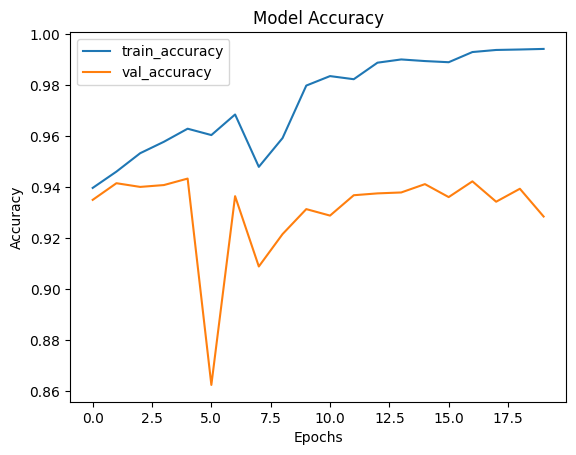

In [45]:
 plt.title('Model Accuracy')
 plt.ylabel('Accuracy')
 plt.xlabel('Epochs')
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.legend(['train_accuracy', 'val_accuracy'])

### Model Evaluation and Testing

In [67]:
test_dataset = test_dataset.batch(1)
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [66]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [68]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 21s 3ms/step - loss: 0.3490 - accuracy: 0.9285


[0.34901899099349976, 0.9285455346107483]

In [75]:
lenet_model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 14s 14s/step


0.99845624

In [76]:
#### Defining the disease based on the accuracy
def parasite_or_not(x):
  if(x<0.5):
    return str('Parasitic')
  else:
    return str('Uninfected')

1/1 [==============================] - 0s 19ms/step


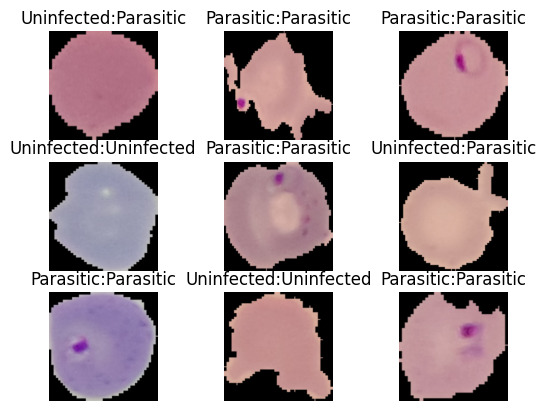

In [84]:
### Testing on 9 different elements

for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3, i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))
  plt.axis('off')


##Loading and Saving

In [87]:
lenet_model.save("lenet")

In [88]:
lenet_loaded_model = tf.keras.models.load_model('lenet')
lenet_loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

1/1 [==============================] - 0s 23ms/step


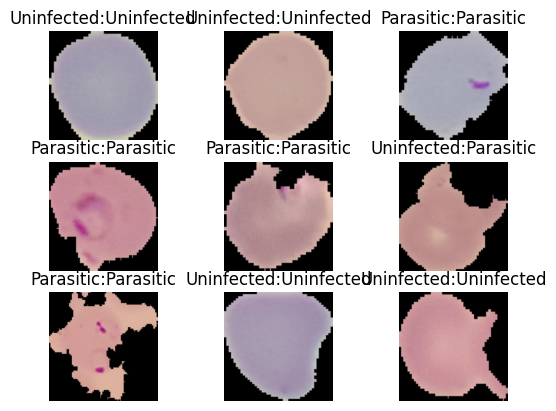

In [89]:
## Testing on loaded model
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3, i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_loaded_model.predict(image)[0][0])))
  plt.axis('off')

In [90]:
### Saving into hdf5 ...its a light weight version of tensorflow saving model
lenet_model.save('lenet.hdf5')

In [91]:
### Saving only the weights
lenet_model.save_weights('weights/lenet_weights')

In [97]:
## TO check the working we will run the model cell again and evaluate to check the accuracy
## and then we will load the weight
##### Evaluating without weights
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 27s 4ms/step - loss: 0.6924 - accuracy: 0.5245


[0.6924343109130859, 0.5244831442832947]

In [99]:
### Loading the weights
lenet_weights_model = lenet_model.load_weights('weights/lenet_weights')  ##location of the weights and the wt file

In [101]:
## Now we evaluate on the loaded weights
lenet_model.load_weights('weights/lenet_weights')
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 23s 4ms/step - loss: 0.3490 - accuracy: 0.9285


[0.34901663661003113, 0.9285455346107483]

## Saving to Google Drive

In [103]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [106]:
### from lenet to destination
!cp -r /content/lenet/ /content/drive/MyDrive/Deep_Learning/Malaria_Detection

In [107]:
### Copying from drive for use
!cp -r  /content/drive/MyDrive/Deep_Learning/Malaria_Detection /content/lenet_colab/